In [7]:
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

# Generate sample data
X, y = make_blobs(n_samples=300, centers=3, n_features=10, cluster_std=1, random_state=10)

# Create DataFrame with features and labels
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['cluster'] = y  # Add the cluster labels
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,cluster
0,5.185174,-11.501848,2.774160,4.869275,-0.495844,-5.436300,-6.263209,5.282353,-6.734545,-8.703062,0
1,4.057721,8.421211,-9.206197,0.170717,3.790197,-0.160710,3.439159,-2.634588,9.267492,4.626848,1
2,0.797771,-7.015042,-2.592417,2.838210,0.480323,-1.378780,3.970297,-1.163687,4.717294,0.744041,2
3,2.568145,9.437263,-10.847769,0.537339,4.876636,1.993905,4.847033,-5.026665,7.661327,2.950633,1
4,3.224449,8.086441,-9.196205,-0.319141,5.937602,1.985384,4.237621,-6.539236,7.179183,4.722167,1
...,...,...,...,...,...,...,...,...,...,...,...
295,1.461639,9.186609,-8.739266,0.574454,5.610850,3.851143,3.187193,-2.602818,7.949406,2.892264,1
296,0.496870,-8.283441,-2.015094,3.729453,-1.649699,-1.430609,1.192894,0.066690,1.230972,1.297035,2
297,3.388059,7.760508,-8.893735,2.038794,7.543784,1.681979,4.380632,-5.515078,9.087801,3.247593,1
298,5.581316,-8.984284,3.320250,5.125642,-0.581202,-5.569570,-6.196859,4.754299,-6.460911,-8.352998,0


In [8]:
df['cluster'].value_counts()

cluster
0    100
1    100
2    100
Name: count, dtype: int64

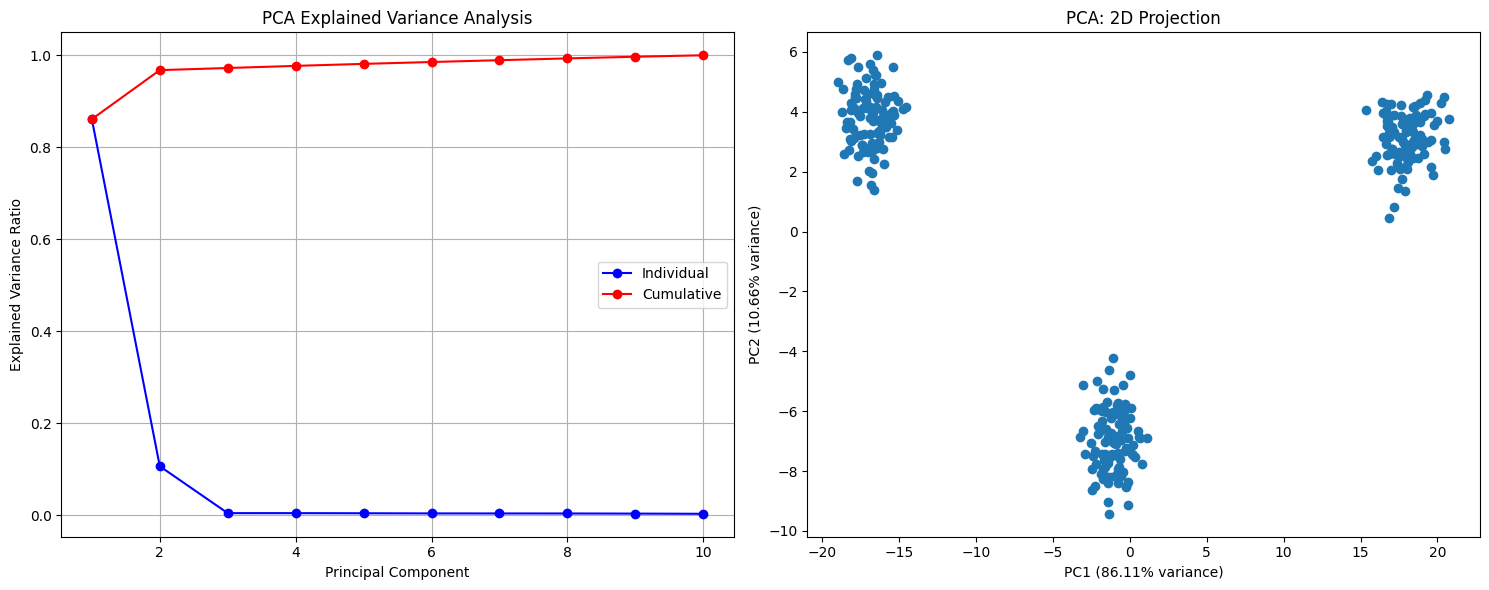

In [9]:
# First, let's analyze all components to see explained variance
pca_full = PCA()
pca_full.fit(X)

# PCA for 2 components
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X)

# Create subplots for both visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Explained variance ratio (scree plot)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', label='Individual')
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', label='Cumulative')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('PCA Explained Variance Analysis')
ax1.legend()
ax1.grid(True)

# Plot 2: 2D PCA visualization
scatter = ax2.scatter(X_pca[:, 0], X_pca[:, 1])
ax2.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
ax2.set_title('PCA: 2D Projection')

plt.tight_layout()
plt.show()

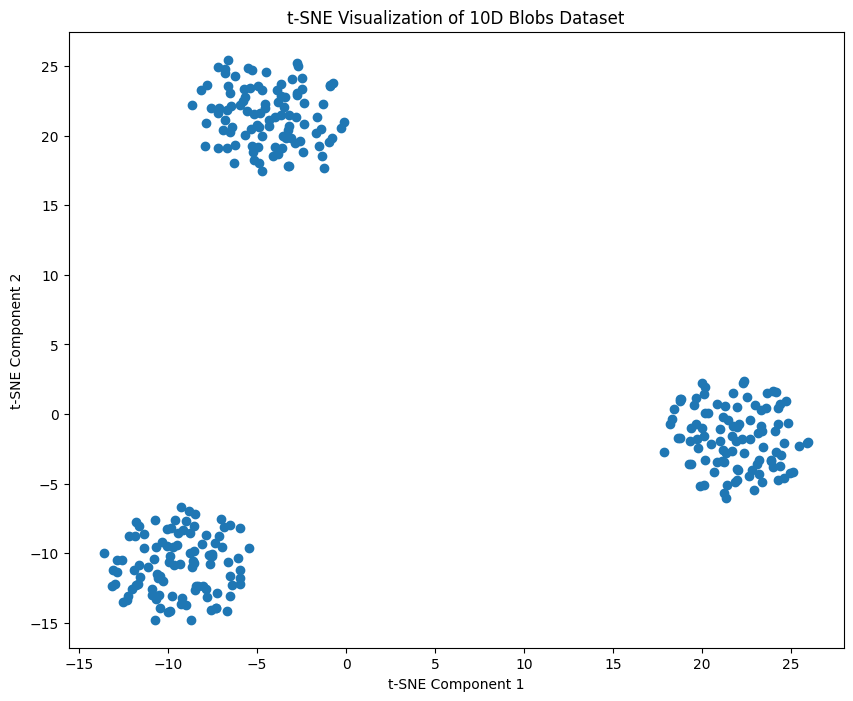

In [10]:
# Apply t-SNE to reduce dimensionality from 10D to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization of 10D Blobs Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [11]:
# Additional imports for LDA classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

Pipeline created: PCA -> LDA
Pipeline steps:
  1. pca: PCA
  2. lda: LinearDiscriminantAnalysis

Training pipeline on 240 samples...
Pipeline training completed!

PCA component info:
Explained variance ratio: [0.86258794 0.10618612]
Cumulative explained variance: 0.969

Model Performance:
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



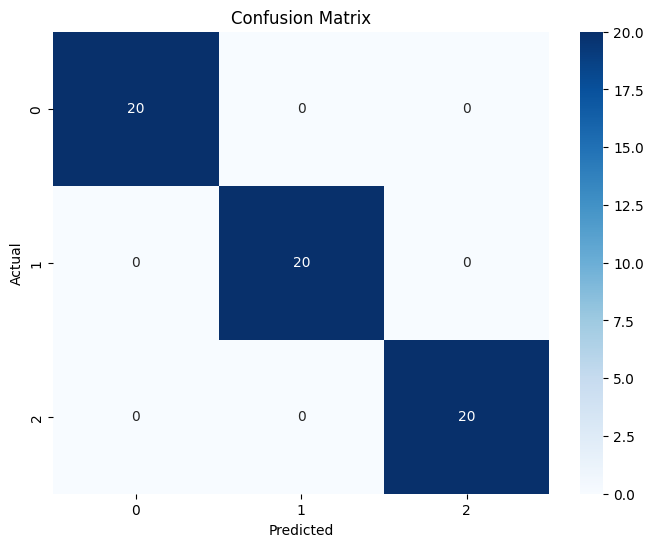

In [12]:
# Create a pipeline with PCA and LDA
# Note: We'll use the original data X and let the pipeline handle PCA transformation
pipeline = Pipeline([
    ('pca', PCA(n_components=2)),  # First apply PCA
    ('lda', LinearDiscriminantAnalysis())  # Then apply LDA
])

# Split original data for the pipeline (80% train, 20% test)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
                                                            X, y, 
                                                            test_size=0.2, 
                                                            random_state=42, 
                                                            stratify=y
                                                        )

print("Pipeline created: PCA -> LDA")
print("Pipeline steps:")
for i, (name, step) in enumerate(pipeline.steps):
    print(f"  {i+1}. {name}: {step.__class__.__name__}")

# Fit the pipeline
print(f"\nTraining pipeline on {X_train_orig.shape[0]} samples...")
pipeline.fit(X_train_orig, y_train_orig)

print("Pipeline training completed!")

# Get PCA component info from the fitted pipeline
pca_component = pipeline.named_steps['pca']
print(f"\nPCA component info:")
print(f"Explained variance ratio: {pca_component.explained_variance_ratio_}")
print(f"Cumulative explained variance: {pca_component.explained_variance_ratio_.sum():.3f}")

# Make predictions
y_pred = pipeline.predict(X_test_orig)

# Evaluate the model
accuracy = accuracy_score(y_test_orig, y_pred)
print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"\nClassification Report:")
print(classification_report(y_test_orig, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_orig, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()